In [6]:
%load_ext autoreload
%autoreload 2

%cd ../

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Users\Marcel\github\deep-optimal-control


# ODENet applied to MNIST dataset

## Imports

In [25]:
import numpy as np


## Load Data

In [26]:
from src.data.load_data import get_mnist
from torch.utils.data import DataLoader

train_set, test_set = get_mnist()
train = DataLoader(train_set, 32, shuffle=True, num_workers=6)
test = DataLoader(test_set, num_workers=6)

In [27]:
import matplotlib.pyplot as plt

def plot_image(image, predictions_array, true_label):
    plt.grid(False)
    plt.xticks([]); plt.yticks([])
    
    plt.imshow(image, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
    plt.show()
    
    
def plot_value_array(predictions_array, true_label):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  

## Model

### Construct Model

In [28]:
from src.odenet.odenet import EulerNet
print('Initializing network')
net = EulerNet((1, 28, 28), 5, reduce_to=10)

Initializing network


### Make an untrained prediction

[1.2109552e-05 2.7289556e-05 7.6033619e-05 1.5455243e-03 5.6111949e-06
 3.6419107e-05 4.2251433e-08 9.8614228e-01 6.9227484e-05 1.2085544e-02]
torch.Size([1, 1, 28, 28])


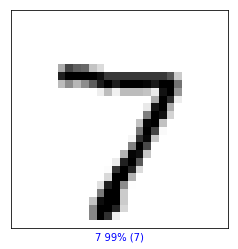

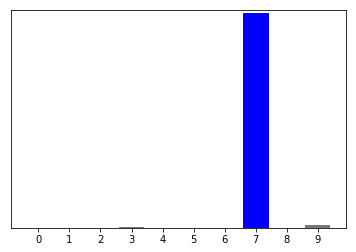

In [31]:
import torch
image, label = next(iter(test))
with torch.no_grad():
    prediction = np.exp(net.forward(image[0].to('cuda:0')).cpu().numpy())[0]
    print(prediction)
    print(image.shape)
    
    plot_image(image[0][0], prediction, label[0])
    plot_value_array(prediction, label[0])
    plt.show()

### Train model

In [30]:
print('Training network')
training_results = net.train_network(train, epochs = 2)
print('Finished training')

Training network
Using device 'cuda:0' for training


Finished training


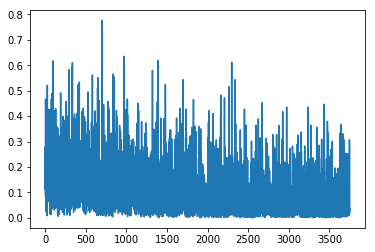

In [22]:
plt.plot(training_results)
plt.show()

### Plot results

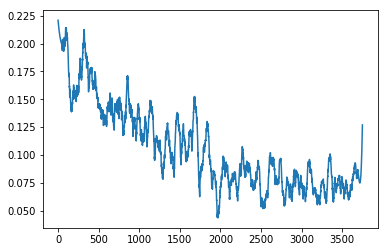

In [23]:
from scipy.signal import savgol_filter
plt.plot(savgol_filter(training_results, 101, 3))
plt.show()

### Make predictions

In [24]:
print('Accuracy: ', net.evaluate(test))

Accuracy:  0.9765


## Train RK4 ODENet

In [33]:
from src.odenet.odenet import ODENet
rk4_net = ODENet((1, 28, 28), 5, reduce_to=10, rk_method='rk4')

## Attempt to make a prediction

[nan nan nan nan nan nan nan nan nan nan]
torch.Size([1, 1, 28, 28])


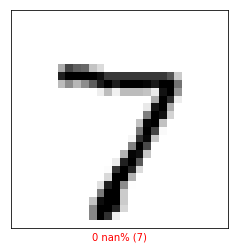

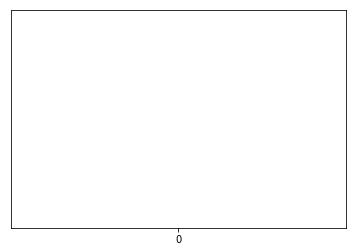

In [35]:
import torch
image, label = next(iter(test))
with torch.no_grad():
    prediction = np.exp(rk4_net.forward(image[0].to('cuda:0')).cpu().numpy())[0]
    print(prediction)
    print(image.shape)
    
    plot_image(image[0][0], prediction, label[0])
    plot_value_array(prediction, label[0])
    plt.show()
    

### Train model

In [36]:
print('Training network')
training_results = rk4_net.train_network(train, epochs = 2)
print('Finished training')

Training network
Using device 'cuda:0' for training


RuntimeError: expand(torch.cuda.FloatTensor{[32, 784]}, size=[784]): the number of sizes provided (1) must be greater or equal to the number of dimensions in the tensor (2)

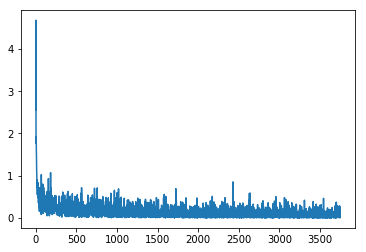

In [33]:
plt.plot(training_results)
plt.show()

### Plot results

In [ ]:
from scipy.signal import savgol_filter
plt.plot(savgol_filter(training_results, 101, 3))
plt.show()

### Make predictions

In [ ]:
print('Accuracy: ', net.evaluate(test))
